# Naive Baseline Model
Probably the most naive approach for prediction of a time series is predicting a constant change of 0 compared to the previous observation. This is the baseline for any model we build. If we manage to beat this prediction, the model is actually valuable. Otherwise, it is not worth using.

In [21]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import preprocessing.numerical_data as pnd
sns.set_style("darkgrid")

In [22]:
df = pd.read_csv(os.path.join("data", "raw", "input.csv"), sep=";", index_col=0, parse_dates=[0], dtype=np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 994 entries, 2018-11-07 to 2015-01-02
Data columns (total 25 columns):
Open                       988 non-null float64
High                       988 non-null float64
Low                        988 non-null float64
Settle                     994 non-null float64
Change                     984 non-null float64
Volume                     988 non-null float64
Prev. Day Open Interest    993 non-null float64
Gas.Open                   990 non-null float64
Gas.High                   990 non-null float64
Gas.Low                    990 non-null float64
Gas.Settle                 994 non-null float64
Gas.Change                 984 non-null float64
Gas.Volume                 984 non-null float64
Coal.Open                  994 non-null float64
Coal.High                  994 non-null float64
Coal.Low                   994 non-null float64
Coal.Settle                994 non-null float64
Coal.Change                994 non-null float64
Coal.Volume 

In [23]:
df = pnd.chain_preparations(df)
loggable_columns = [col for col in df.columns if any(word in col for word in ("Open", "High", "Low", "Settle"))
                   and not "Interest" in col]
df[loggable_columns] = (df[loggable_columns] + 1).apply(np.log)

The naive model will always predict a change of 0. We can easily mock these predictions with the DataFrame containing our preprocessed data.

In [24]:
errors = df["Change"].values

Absolute Error Mean: 0.1724049331963001
Error Standard Deviation: 0.3047971351051712
RMSE: 0.3048904239335372


c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


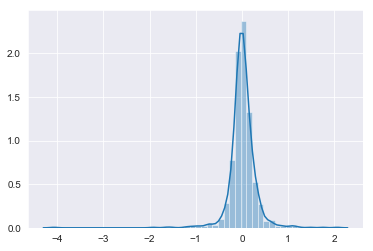

In [25]:
sns.distplot(errors)
print("Absolute Error Mean:", np.abs(errors).mean())
print("Error Standard Deviation:", errors.std(ddof=1))
print("RMSE:", np.sqrt(np.square(errors).mean()))

The errors seem to follow a normal distribution. We can also see that the naive model is off by 17 cents, on average. A machine learning model should learn associations that cannot be captured by this naive approach. Consequently, we aim to obtain a model that has a RMSE of less than .3. Let us check a plot of the error to do residual diagnostics.

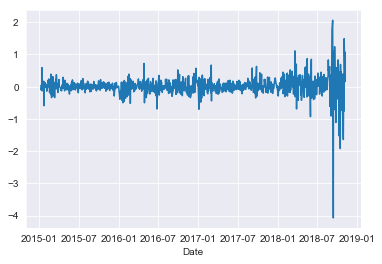

In [26]:
sns.lineplot(df.index, errors)

The error plot reveals an extreme issue. Starting in January 2018, the residuals vary a lot more, showing symptoms of heteroscedasticity in the error terms of the constant prediction. In order to be able to compare the naive approach to a statistical learning approach, we will need to adjust for that. We will make the arbitrary choice to use the last 20% of the data set as a validation set so we can train models on the first 80% of the data. For time series data, using rolling intervals and performing day-ahead predictions is a reasonable way to allow for leave one out cross validation. We will mimic this approach here as well.

Absolute Error Mean: 0.3851282051282052
Error Standard Deviation: 0.5972109287938312
RMSE: 0.5978285493006958
MSE: 0.35739897435897455


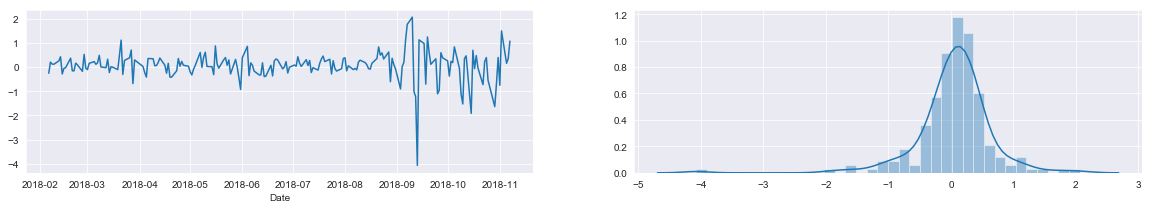

In [41]:
errors = df["Change"].values[int(len(df) * 0.8):]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 3))
sns.lineplot(df.index[int(len(df) * 0.8):], errors, ax=axes[0])
sns.distplot(errors, ax=axes[1])
print("Absolute Error Mean:", np.abs(errors).mean())
print("Error Standard Deviation:", errors.std(ddof=1))
mse = np.square(errors).mean()
print("RMSE:", np.sqrt(mse))
print("MSE:", mse)

To be continued...